## RL Lab 05 - Q-learning on Nondeterminstic Worlds!

### Determnistic Worlds

In [1]:
import gym
from gym.envs.registration import register

# Register FrozenLake with is_slippery False
register(id='FrozenLake-v3',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name': '4x4', 'is_slippery': False})

env = gym.make('FrozenLake-v3')
env.render()  # show the initial board

[2017-07-11 22:57:48,198] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG


In [4]:
# MACROS
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

arrow_keys = {'a': LEFT, 
               's': DOWN,
               'd': RIGHT,
               'w': UP}
env.reset()
while True:
    # Choose an action from keyboard
    key = input()
    if key not in arrow_keys.keys():
        print('Game aborted!')
        break

    action = arrow_keys[key]
    state, reward, done, info = env.step(action)
    env.render()  # show the board after action
    print('State:', state, 'Action:', action, 'Reward:', reward, 'Info:', info)
    
    if done:
        print('Finished with reward', reward)
        break

d
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 1 Action: 2 Reward: 0.0 Info: {'prob': 1.0}
d
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 2 Action: 2 Reward: 0.0 Info: {'prob': 1.0}
s
  (Down)
SFFF
FHFH
FFFH
HFFG
State: 6 Action: 1 Reward: 0.0 Info: {'prob': 1.0}
s
  (Down)
SFFF
FHFH
FFFH
HFFG
State: 10 Action: 1 Reward: 0.0 Info: {'prob': 1.0}
s
  (Down)
SFFF
FHFH
FFFH
HFFG
State: 14 Action: 1 Reward: 0.0 Info: {'prob': 1.0}
d
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 15 Action: 2 Reward: 1.0 Info: {'prob': 1.0}
Finished with reward 1.0


### Nondeterministci Worlds!

In [9]:
env = gym.make('FrozenLake-v0')
env.render()
env.reset()
while True:
    # Choose an action from keyboard
    key = input()
    if key not in arrow_keys.keys():
        print('Game aborted!')
        break

    action = arrow_keys[key]
    state, reward, done, info = env.step(action)
    env.render()  # show the board after action
    print('State:', state, 'Action:', action, 'Reward:', reward, 'Info:', info)
    
    if done:
        print('Finished with reward', reward)
        break

[2017-07-11 23:02:54,736] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
d
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 1 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
d
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 2 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
s
  (Down)
SFFF
FHFH
FFFH
HFFG
State: 3 Action: 1 Reward: 0.0 Info: {'prob': 0.3333333333333333}
a
  (Left)
SFFF
FHFH
FFFH
HFFG
State: 7 Action: 0 Reward: 0.0 Info: {'prob': 0.3333333333333333}
Finished with reward 0.0


### Previous Q-learning

Success rate:0.0205
Final Q-Table Value
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.99  0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


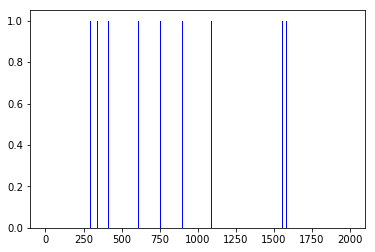

In [17]:
import numpy as np
import matplotlib.pyplot as plt

num_episodes = 2000
dis = 0.99
Q = np.zeros([env.observation_space.n, env.action_space.n])
rList=[]

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / ((i // 100) + 1)
    
    # The Q-Table learning alrogithm
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # Get new state and reward from enviroment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print('Success rate:' + str(sum(rList) / num_episodes))
print('Final Q-Table Value')
print(Q)
plt.bar(range(len(rList)), rList, color='b')
plt.show()

### New Q-learning algorithm

Success rate:0.689
Final Q-Table Value
[[  6.63924951e-01   7.76781897e-03   2.46071943e-02   3.09990393e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   4.82558424e-01]
 [  2.56633126e-03   3.86531888e-01   0.00000000e+00   0.00000000e+00]
 [  1.59559569e-03   7.44738124e-04   4.48130366e-03   4.17277735e-01]
 [  7.56659595e-01   4.35907903e-03   0.00000000e+00   1.22355752e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.85968795e-04   0.00000000e+00   3.15595909e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.86013552e-03   8.15544360e-01]
 [  0.00000000e+00   5.84603755e-01   1.57737733e-03   0.00000000e+00]
 [  2.17841593e-01   3.54108867e-03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   

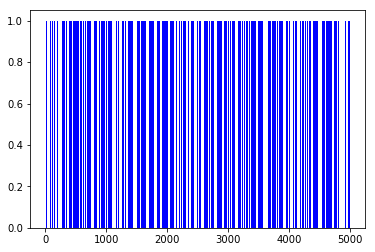

In [24]:
num_episodes = 5000
dis = 0.99
learning_rate = 0.7

Q = np.zeros([env.observation_space.n, env.action_space.n])
rList=[]

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / ((i // 100) + 1)
    
    # The Q-Table learning alrogithm
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # Get new state and reward from enviroment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-table with new knowledge using decay rate
        Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print('Success rate:' + str(sum(rList) / num_episodes))
print('Final Q-Table Value')
print(Q)
plt.bar(range(len(rList)), rList, color='b')
plt.show()